<img src="https://www.peoplecert.org/-/media/peoplecert/images/tc-images/peoplelogy-skill/peopleogy-logo.png?h=966&iar=0&w=2231&hash=28DD04BA69030200BD7ADEA1370449B3" style="float: left; margin: 20px; height: 55px">

# Capstone Project : Applicant Details for Loan Approval

> Author: Muhammad Afif Bin Adeni

<img src="assets/applyinghousingloan-mainimage.jpg" style="height: 400px">

[*image source*](https://www.propertyguru.com.my/property-guides/apply-housing-loan-malaysia-18685)

---
## Step 1: Define The Problem.

Financial institutions, such as banks, face the challenge of efficiently and accurately assessing the creditworthiness of loan applicants. Without robust loan approval systems in place, banks encounter several issues that hinder their lending operations and risk management practices. A cumbersome and lengthy loan approval process can negatively impact the customer experience, leading to frustration and potential loss of business for banks. 

A bad decision from the credit officer also can lead to bankruptcy among the borrowers which nearly half of Malaysia’s bankruptcy cases (46.3%) are due to personal loans, which accounted for 2,225 cases last year.


The primary objective of this project is to develop a robust predictive system that can accurately forecast whether an individual applying for a loan is likely to default on their payments. By identifying key features and patterns within applicant details, the aim is to create a tool that financial institutions can utilize to assess risk and make informed lending decisions, ultimately minimizing potential losses due to loan defaults.


---
## Step 2: Obtain the data.

### 2. Read in the file titled "Applicant-details.csv."


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
details = pd.read_csv('Applicant-details.csv')
details.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


---
## Step 3: Explore the data.

### 3. Conduct exploratory data analysis on this dataset.


In [3]:
#checking any missing data in the dataframe
details.isnull().sum()

Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

In [4]:
#identify the data type of each column
details.dtypes

Applicant_ID                    int64
Annual_Income                   int64
Applicant_Age                   int64
Work_Experience                 int64
Marital_Status                 object
House_Ownership                object
Vehicle_Ownership(car)         object
Occupation                     object
Residence_City                 object
Residence_State                object
Years_in_Current_Employment     int64
Years_in_Current_Residence      int64
Loan_Default_Risk               int64
dtype: object

In [5]:
#Drop unnecessary columns 
details.drop(columns = ['Applicant_ID', 'Occupation', 'Residence_City', 'Residence_State'], inplace = True)

In [6]:
#Convert categorical variables into dummy/indicator variables. 
#Dummy variables are binary variables that represent categories as integers.
#Converting categorical variables into numerical format suitable for Machine learning algorithms.
details = pd.get_dummies(details, columns = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)'],
                         drop_first = True, dtype = int)
details.head()

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Marital_Status_single,House_Ownership_owned,House_Ownership_rented,Vehicle_Ownership(car)_yes
0,9657655,76,0,0,12,0,1,0,1,0
1,9259353,37,18,12,11,0,1,0,1,0
2,1509721,66,8,4,12,0,1,0,1,0
3,5867312,43,1,1,13,1,1,1,0,0
4,7223191,44,9,9,13,0,1,0,1,0


In [7]:
#Checking all the datatypes are ready and suitable for Machine learning algorithms.
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Annual_Income                100000 non-null  int64
 1   Applicant_Age                100000 non-null  int64
 2   Work_Experience              100000 non-null  int64
 3   Years_in_Current_Employment  100000 non-null  int64
 4   Years_in_Current_Residence   100000 non-null  int64
 5   Loan_Default_Risk            100000 non-null  int64
 6   Marital_Status_single        100000 non-null  int32
 7   House_Ownership_owned        100000 non-null  int32
 8   House_Ownership_rented       100000 non-null  int32
 9   Vehicle_Ownership(car)_yes   100000 non-null  int32
dtypes: int32(4), int64(6)
memory usage: 6.1 MB


In [8]:
details.describe().astype(int)

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Marital_Status_single,House_Ownership_owned,House_Ownership_rented,Vehicle_Ownership(car)_yes
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
mean,5001617,49,10,6,11,0,0,0,0,0
std,2876393,17,5,3,1,0,0,0,0,0
min,10310,21,0,0,10,0,0,0,0,0
25%,2507092,35,5,4,11,0,1,0,1,0
50%,5004938,50,10,6,12,0,1,0,1,0
75%,7477502,65,15,9,13,0,1,0,1,1
max,9999180,79,20,14,14,1,1,1,1,1


In [9]:
#showing the mean of each column
details.mean().astype(int)

Annual_Income                  5001617
Applicant_Age                       49
Work_Experience                     10
Years_in_Current_Employment          6
Years_in_Current_Residence          11
Loan_Default_Risk                    0
Marital_Status_single                0
House_Ownership_owned                0
House_Ownership_rented               0
Vehicle_Ownership(car)_yes           0
dtype: int32

# What is our baseline accuracy?
The baseline accuracy is the percentage of the majority class, regardless of whether it is 1 or 0. It serves as the benchmark for our model to beat.

In [10]:
#calculates the frequency of each unique value in the dependant variable(Loan_Default_Risk).
details['Loan_Default_Risk'].value_counts()

Loan_Default_Risk
0    87003
1    12997
Name: count, dtype: int64

In [11]:
# Undersampling to balance the data

from sklearn.utils import resample

# Separate majority and minority classes
majority_class = details[details['Loan_Default_Risk'] == 0]
minority_class = details[details['Loan_Default_Risk'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_class),  # match minority class size
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled_details = pd.concat([majority_downsampled, minority_class])

# Display new class distribution
print(downsampled_details['Loan_Default_Risk'].value_counts())


Loan_Default_Risk
0    12997
1    12997
Name: count, dtype: int64


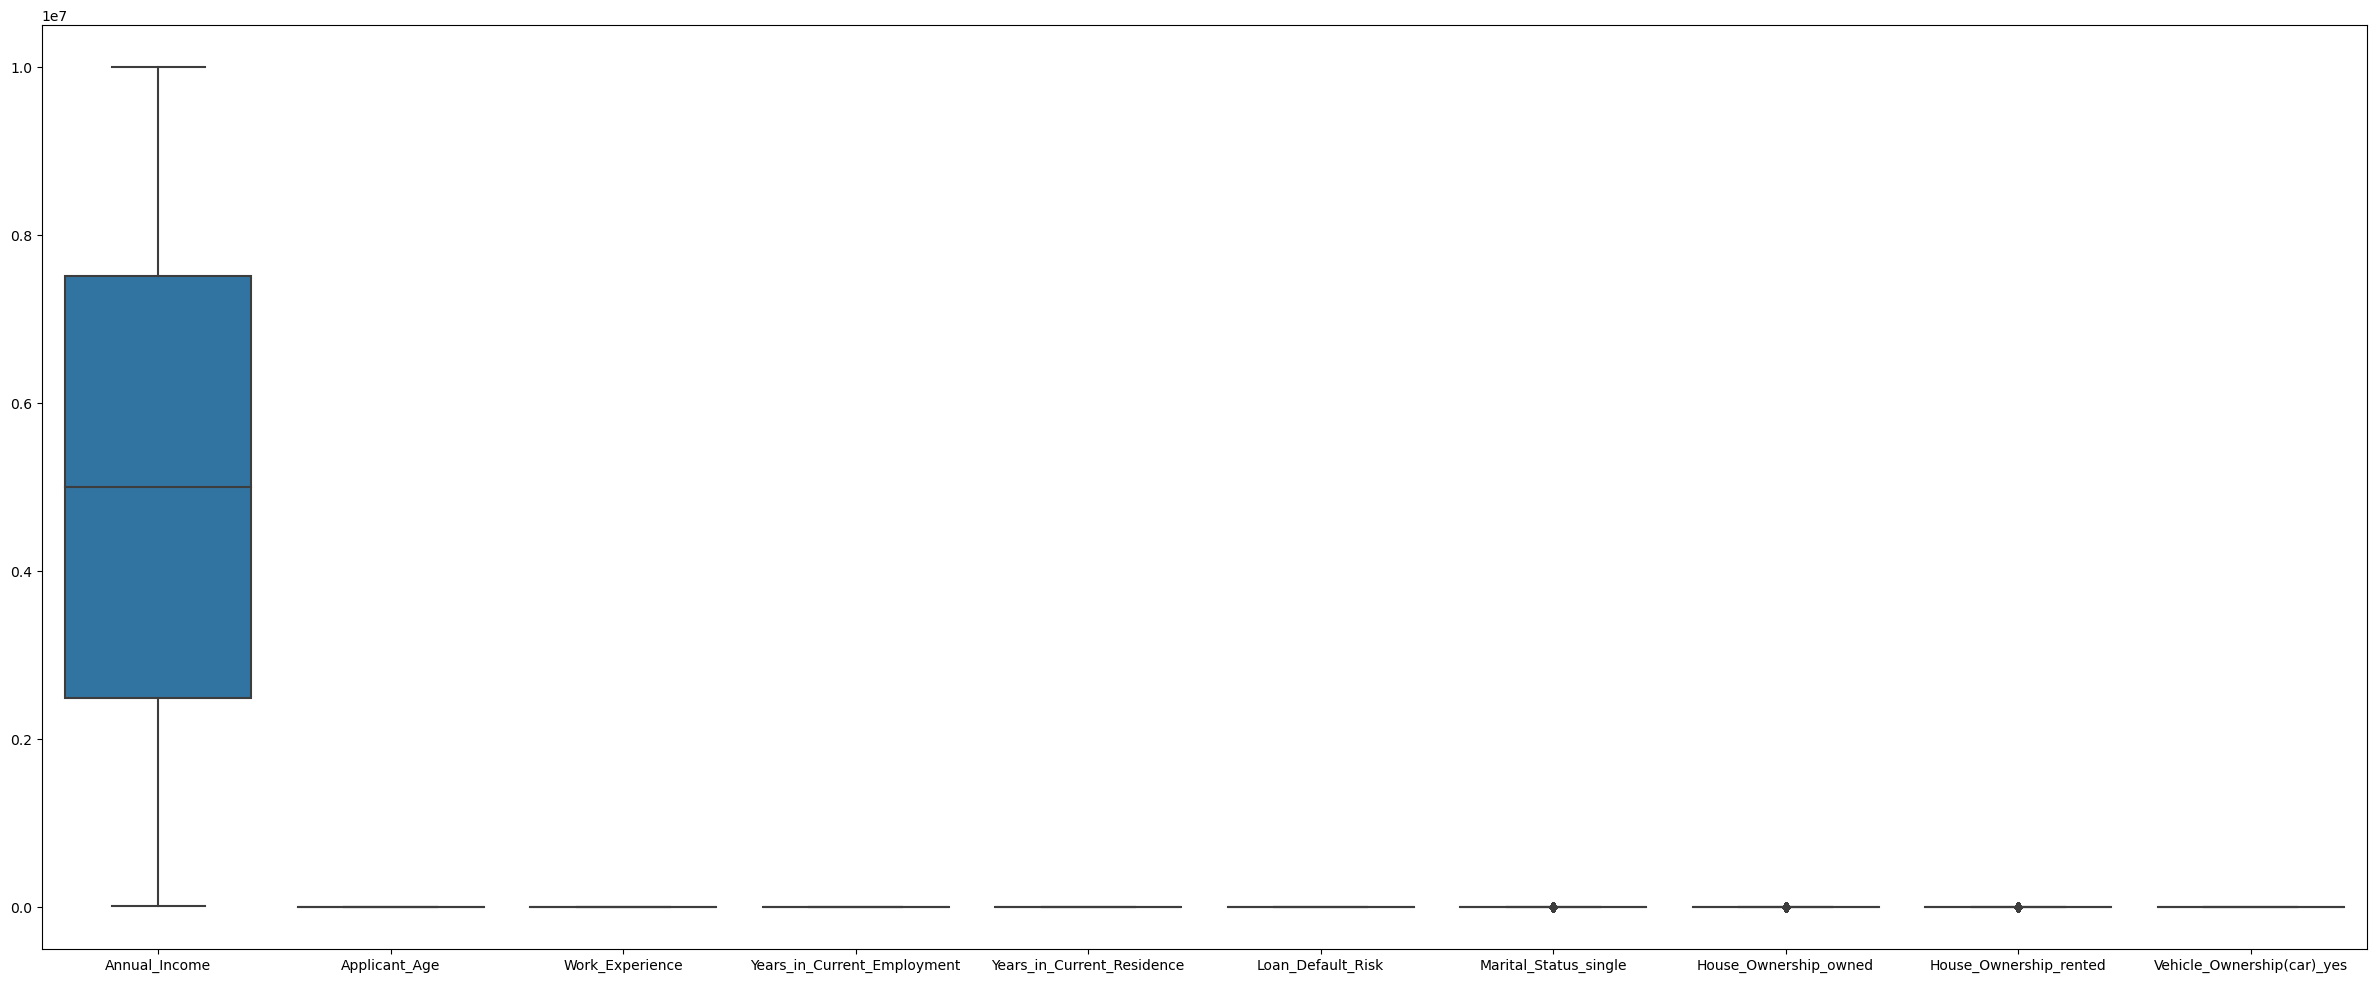

In [12]:
plt.figure(figsize=(30,12))
sns.boxplot(downsampled_details)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


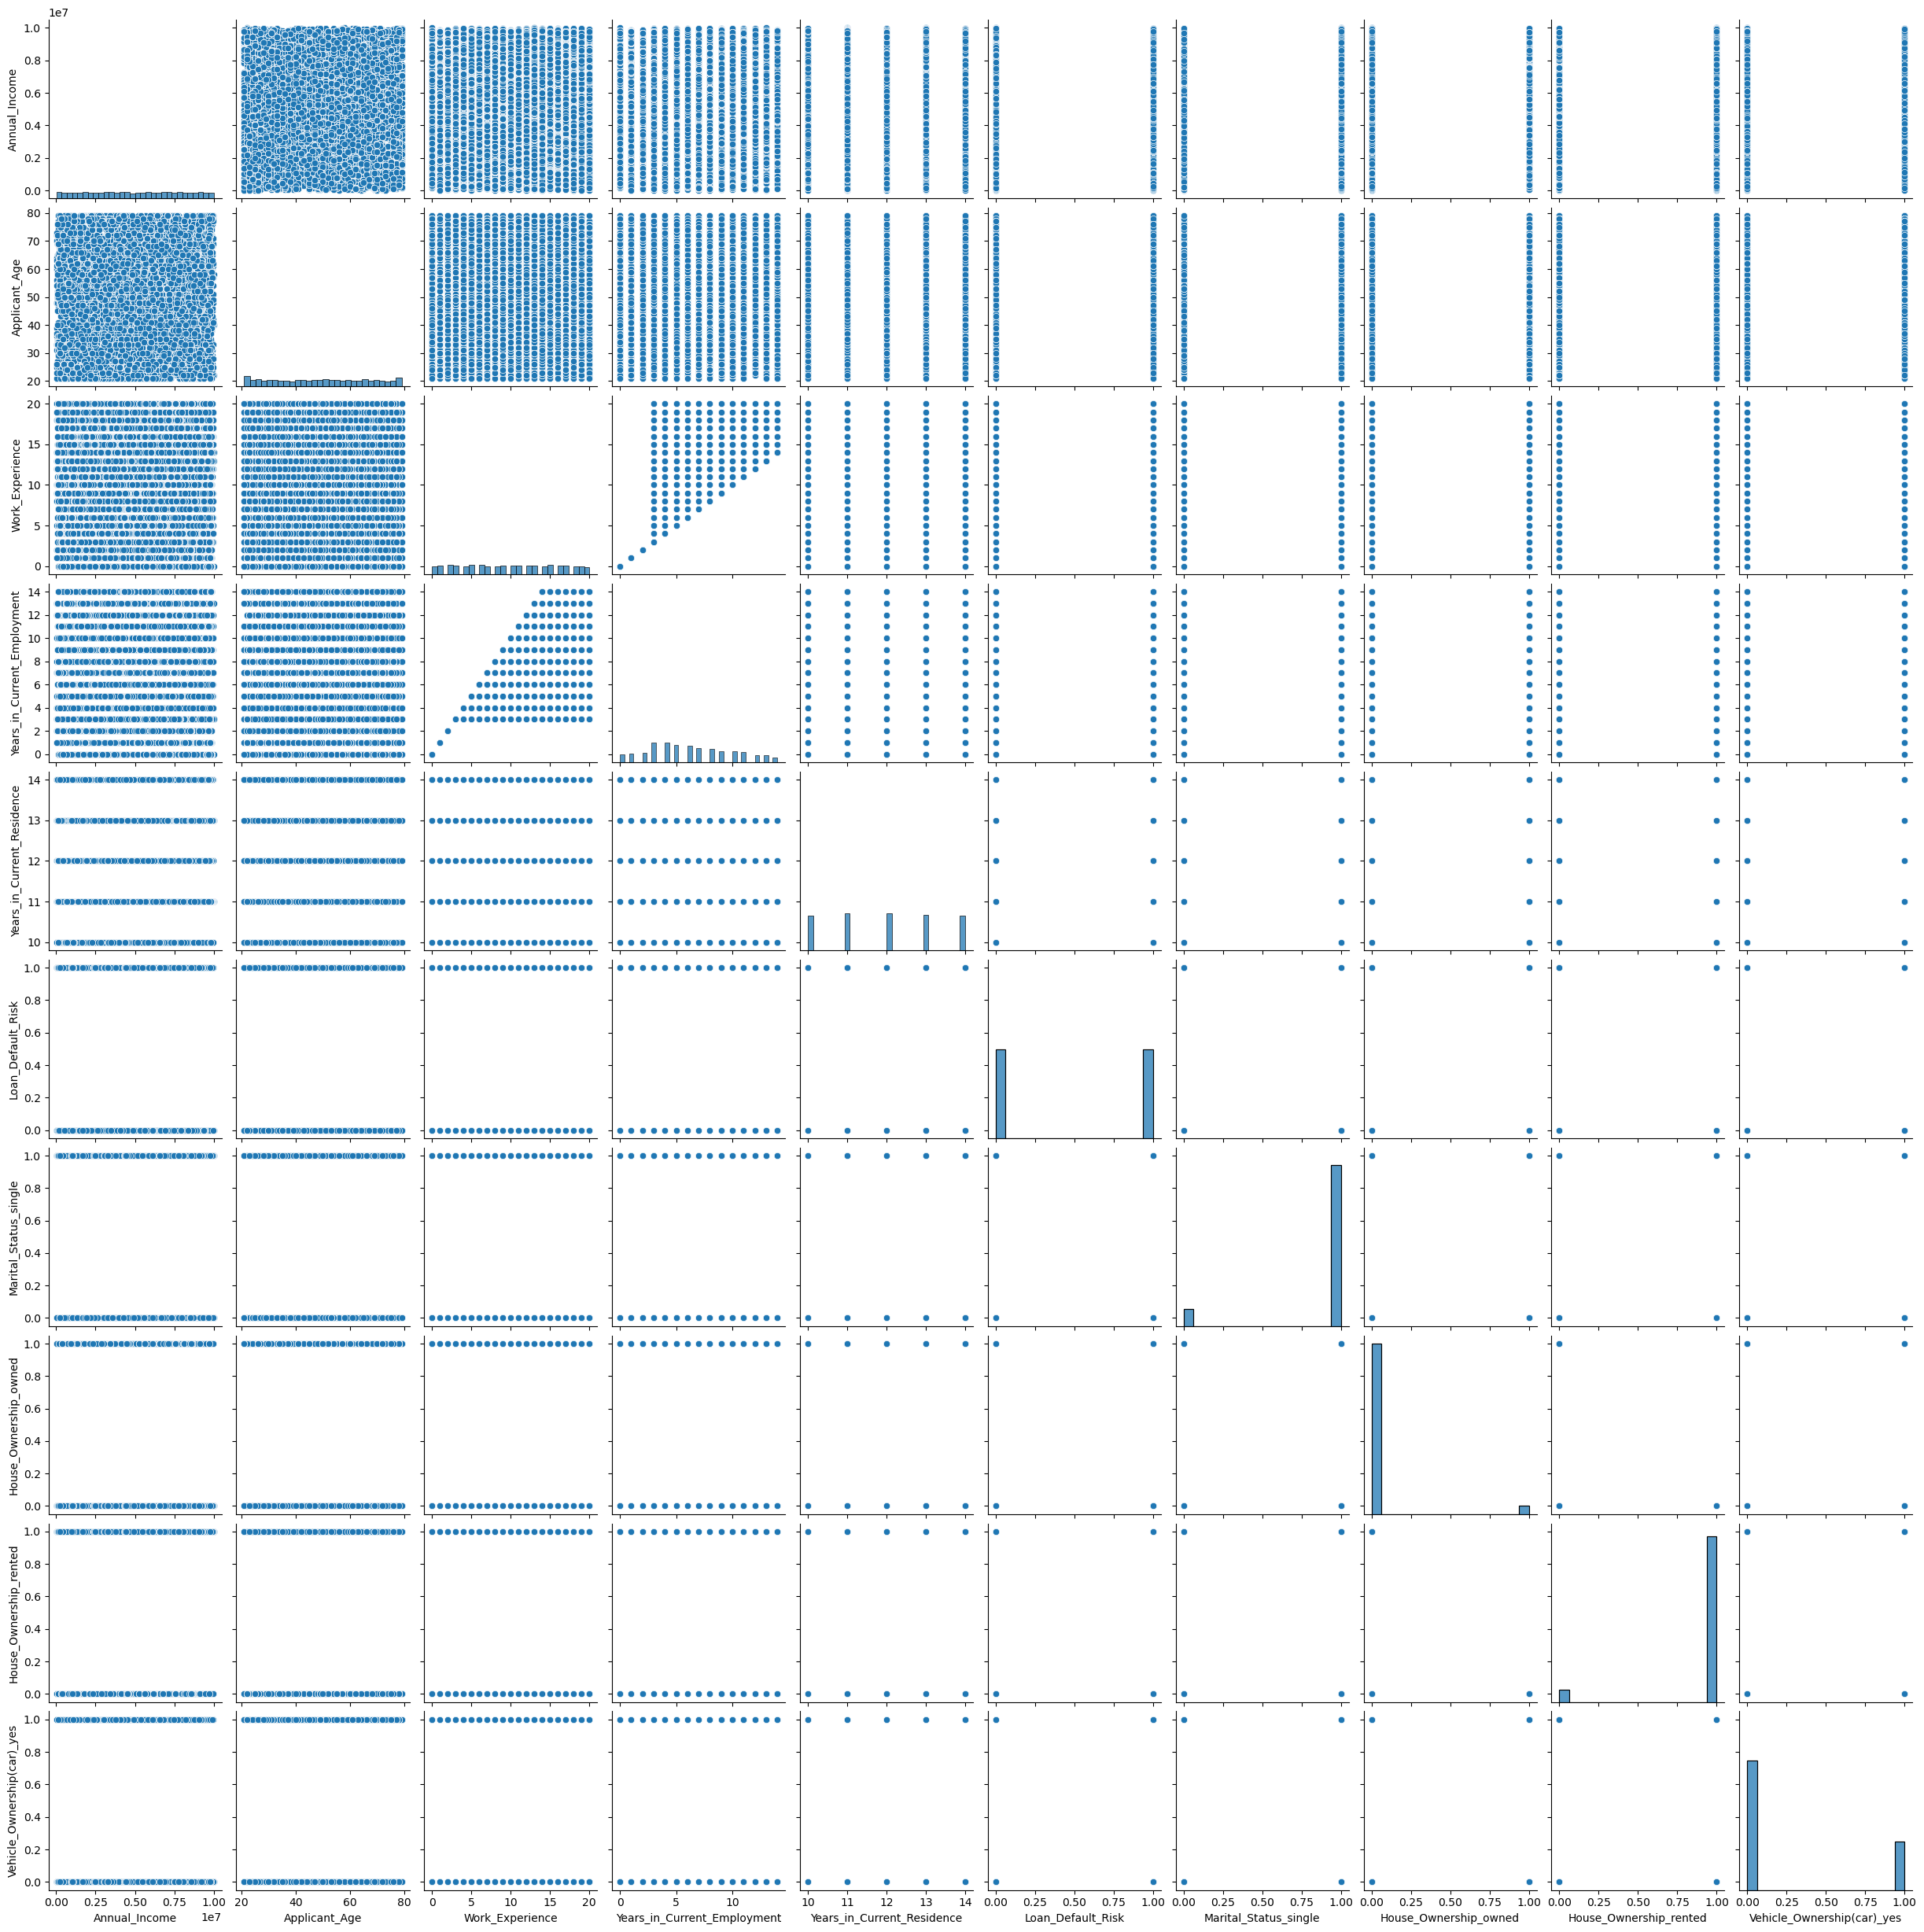

In [13]:
sns.pairplot(downsampled_details)
plt.show()

<Axes: >

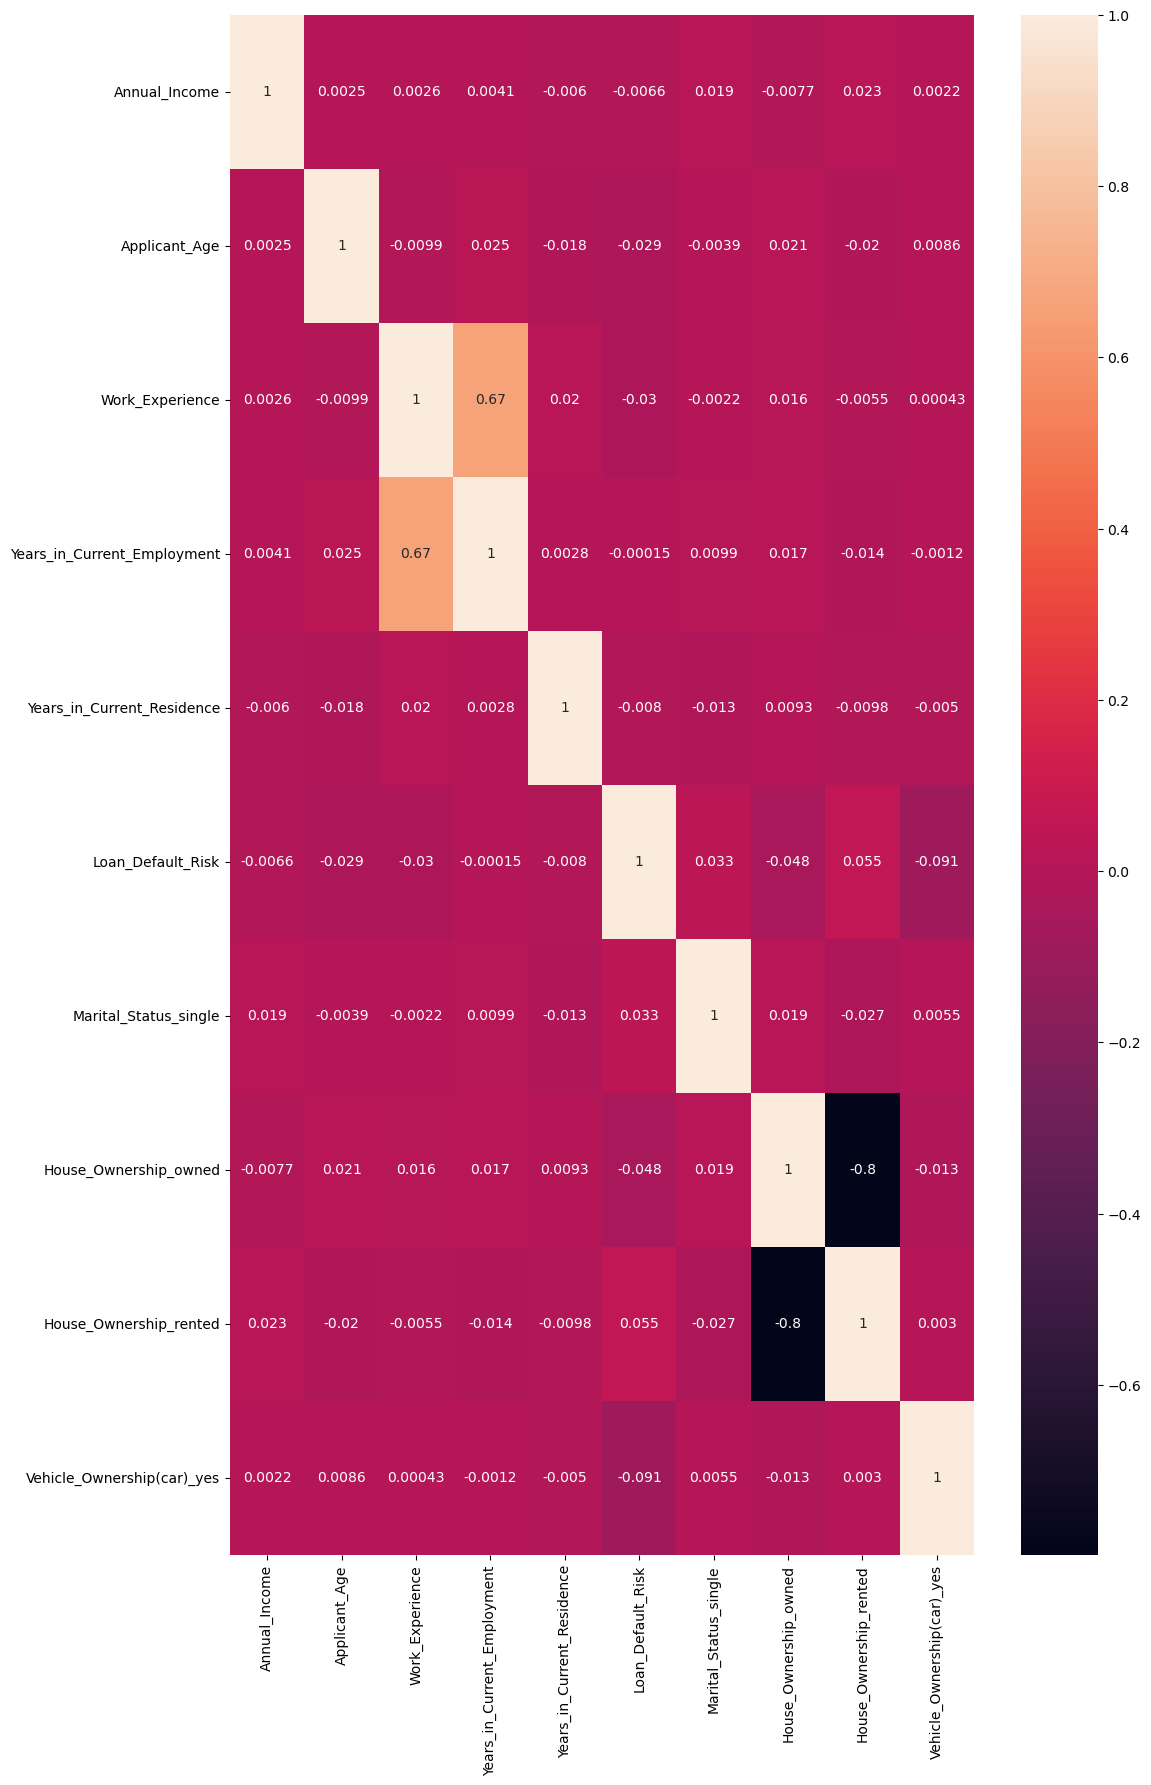

In [14]:
#plot the heatmap

plt.figure(figsize=(12,20))
sns.heatmap(downsampled_details.corr(numeric_only = True), annot=True)

---

## Step 4: Model the data

<img src="assets/maxresdefault.jpg" style="height: 400px">

[*image source*](https://www.youtube.com/watch?app=desktop&v=75e1RjrxSI4)

#### First model: Random Forest 

Random Forest is a versatile machine learning algorithm that can be used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Random Forest has several advantages:

It is robust to overfitting because it combines multiple decision trees.
It can handle large datasets with high dimensionality.
It provides estimates of feature importance, which can be useful for feature selection.

Overall, Random Forest is a powerful algorithm that often performs well across a wide range of datasets and is relatively easy to use without extensive hyperparameter tuning.

In [15]:
X = downsampled_details.drop(columns = 'Loan_Default_Risk')
y = downsampled_details['Loan_Default_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

Step 5: Model Evaluation
---


In [16]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9516710747775908

In [17]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9529694638134167


{'max_depth': None, 'n_estimators': 200}

In [18]:
gs.score(X_train, y_train)

0.9626833373407069

In [19]:
gs.score(X_test, y_test)

0.9555683785343335

In [20]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
Sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", Sensitivity)
print("F1 Score:", f1)
print("Specificity:", specificity)
print()
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9544143104443162
Precision: 0.9198845182244677
Recall: 0.9941497659906396
F1 Score: 0.955576382380506
Specificity: 0.9157495256166983

Confusion Matrix:
 [[2413  222]
 [  15 2549]]


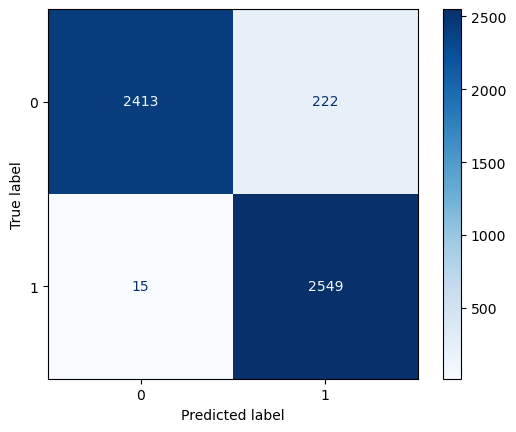

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [23]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': rf.predict_proba(X_test)[:,1]})

pred_df.head()

,true_values,pred_probs
1863,1,0.888189
15826,0,0.048571
76979,1,1.000000
79209,0,0.221632
23210,0,0.000000


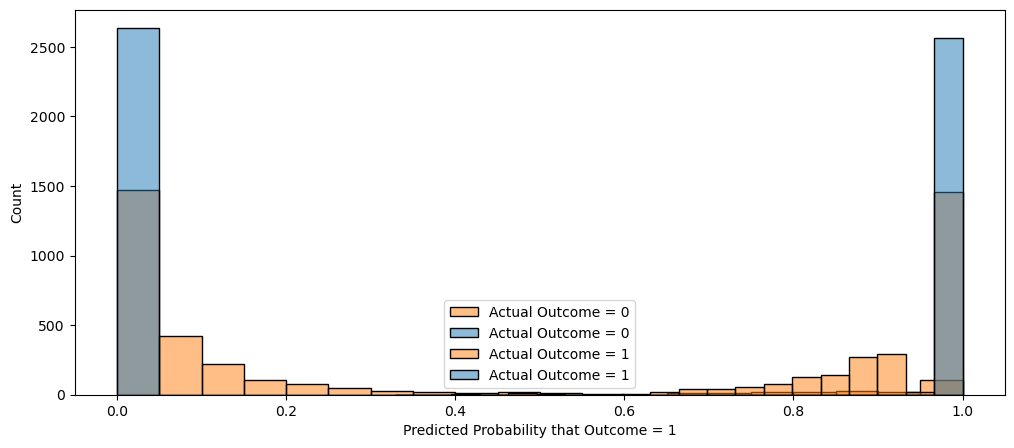

In [24]:
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.histplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')

plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();


In [25]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
fpr,tpr,thresholds1 = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr) 
precision,recall,thresholds2 = precision_recall_curve(y_test,y_pred)

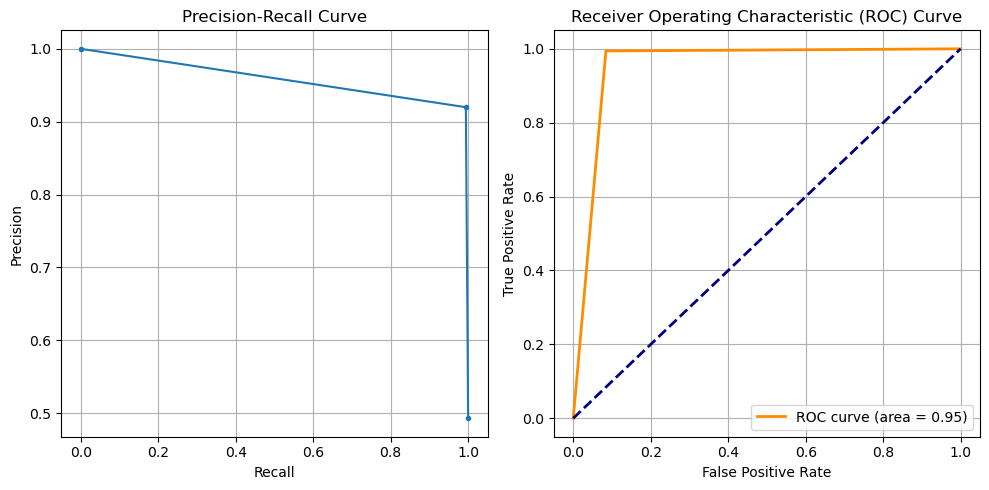

In [26]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(recall,precision,marker='.')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve')
axes[0].grid(True)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')
axes[1].grid(True)
plt.tight_layout()
plt.show()

In [27]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9652332544914699

The ROC AUC score of approximately 0.97 for the random forest model indicates that the model has a strong ability to discriminate between the positive and negative classes. A score close to 1.00 suggests that the model has excellent predictive performance and can effectively differentiate between loan default and non-default cases.

---

## Step 4: Model the data.

### Second Model: Logistic Regression

A statistical method used for binary classification tasks, where the target variable has only two possible outcomes (e.g., yes/no, 0/1). Despite its name, logistic regression is a linear model that estimates the probability that a given input belongs to a particular class.

The logistic regression model uses the logistic function (also known as the sigmoid function) to transform the output of a linear combination of input features into a probability score between 0 and 1.

In [28]:
X_lg = downsampled_details.drop(columns = 'Loan_Default_Risk')
y_lg = downsampled_details['Loan_Default_Risk']

X_lg_train, X_lg_test, y_lg_train, y_lg_test = train_test_split(X_lg, y_lg, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_lg_train)
X_test_scaled = scaler.transform(X_lg_test)

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_lg_train)
y_pred_lg = logreg.predict(X_test_scaled)

Step 5: Model Evaluation
---


In [31]:
cross_val_score(logreg, X_lg_train, y_lg_train, cv=5).mean()

0.4996393363789372

In [32]:
print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')


Logistic Regression Intercept: [0.00570798]
Logistic Regression Coefficient: [[-0.0222829  -0.05506641 -0.11368388  0.08087341 -0.03256791  0.07032054
  -0.02291067  0.11140502 -0.18242657]]


This coefficient value of 0.08087341 suggests that for each unit increase in the `Years_in_Current_Employment` feature, the log-odds of loan default risk being in the positive class (1) versus the negative class (0) increases by approximately 0.08087341.

In [33]:
accuracy = accuracy_score(y_lg_test, y_pred_lg)
sensitivity = recall_score(y_lg_test, y_pred_lg)
precision = precision_score(y_lg_test, y_pred_lg)
specificity = recall_score(y_lg_test, y_pred_lg, pos_label=0)
f1 = f1_score(y_lg_test, y_pred_lg)
conf_matrix = confusion_matrix(y_lg_test, y_pred_lg)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Precision:", precision)
print("Specificity:", specificity)
print("F1-score:", f1)

print()
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5543373725716484
Sensitivity: 0.6368954758190327
Precision: 0.5409075852931434
Specificity: 0.47400379506641366
F1-score: 0.584990148665592

Confusion Matrix:
 [[1249 1386]
 [ 931 1633]]


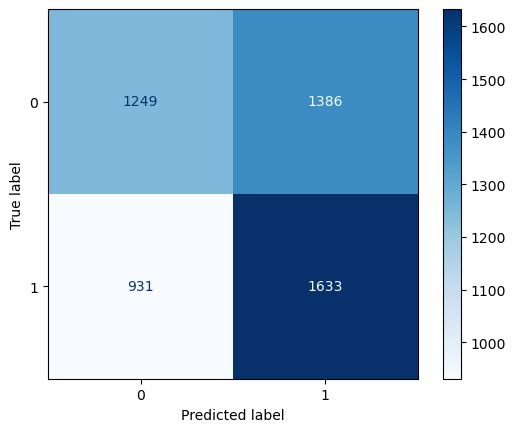

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [35]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
fpr,tpr,thresholds1 = roc_curve(y_lg_test, y_pred_lg)
roc_auc = auc(fpr,tpr) 
precision,recall,thresholds2 = precision_recall_curve(y_lg_test, y_pred_lg)

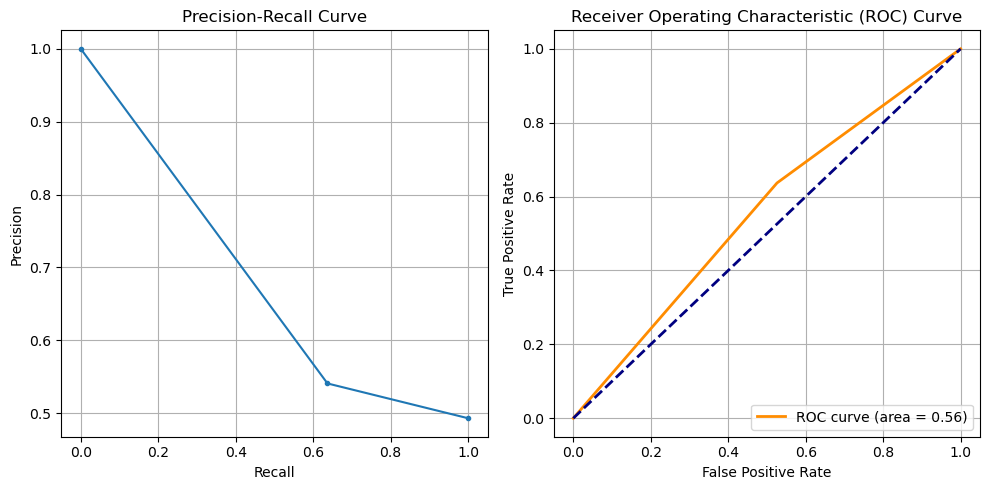

In [36]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(recall,precision,marker='.')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve')
axes[0].grid(True)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')
axes[1].grid(True)
plt.tight_layout()
plt.show()

In [37]:
roc_auc_score(y_lg_test, logreg.predict_proba(X_test)[:,1])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.4992572682034416

A ROC AUC score of 0.50 indicates that the model is not effective at separating the positive and negative classes.

### Step 6: Answer the problem

Overall, the Random Forest model showed promising results in predicting loan default risks based on applicant details. Further refinement of features and model parameters could potentially improve predictive performance. It's essential to monitor model performance over time and update the model periodically to adapt to changing trends and patterns in loan applicant data. Additionally, considering domain expertise and incorporating feedback from financial experts can enhance the robustness and applicability of the predictive model in real-world scenarios.